In [ ]:
# import cv2
# import numpy as np
# import matpltlib.pyplot as plt

# img = cv2.imread('img1.png',0)
# ret,img_bin = cv2.threshold(img,70,255,0)
# img_new = img.copy()
# img_new = np.transpose(img_new)

# for idx,col in enumerate(img_bin.T):
#     zf = np.mean(col)
#     # print(col.shape,zf)
#     if zf>253:
# #         print('whiten',idx, col)
#         # img_new[col][idx]=1
#         img_new[idx][:]=255
# img_new = np.transpose(img_new)
# cv2.imshow('Prescription',img)
# cv2.imshow('Prescription2',img_new)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# plt.imshow(img_new,cmap='gray')

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf

# # Load the pre-trained EMNIST model
# model = tf.keras.models.load_model('model2.h5')
# label_dict = {
#     0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B',
#     12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M',
#     23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X',
#     34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q',
#     45: 'r', 46: 't'
# }


# def image_preprocessing(img):
#     # Convert the image to the appropriate color space
#     input_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#     denoise_img = cv2.fastNlMeansDenoisingColored(input_image, None, 10, 10, 7, 21)
#     img_gray = cv2.cvtColor(denoise_img, cv2.COLOR_BGR2GRAY)
#     ret, thresh2 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (150, 2))
#     mask = cv2.morphologyEx(thresh2, cv2.MORPH_DILATE, kernel)

#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     bounding_boxes = []
#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         if w > 5 and h > 5:  # Filter out small contours (adjust threshold as needed)
#             roi = img_gray[y:y+h, x:x+w]
#             roi_bgr = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)
#             gray_roi = cv2.cvtColor(roi_bgr, cv2.COLOR_BGR2GRAY)
#             _, word_thresh = cv2.threshold(gray_roi, 100, 255, cv2.THRESH_BINARY_INV)
#             word_contours, _ = cv2.findContours(word_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#             for word_contour in word_contours:
#                 word_x, word_y, word_w, word_h = cv2.boundingRect(word_contour)
#                 bounding_boxes.append((x + word_x, y + word_y, word_w, word_h))
#                 cv2.rectangle(img, (x + word_x, y + word_y), (x + word_x + word_w, y + word_y + word_h), (0, 255, 0), 2)

#     plt.imshow(img, cmap='gray')
#     plt.show()

#     return mask, bounding_boxes

# def preprocess_character(char_img):
#     # Resize, reshape, and normalize the character image to match the EMNIST model input size (784,)
#     resized_img = cv2.resize(char_img, (28, 28))
#     resized_img_bgr = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2BGR)  # Convert to three-channel BGR
#     gray_img = cv2.cvtColor(resized_img_bgr, cv2.COLOR_BGR2GRAY)
#     normalized_img = gray_img / 255.0
#     flattened_img = normalized_img.flatten()
#     return flattened_img


# def predict_characters(bounding_boxes, img):
#     for box in bounding_boxes:
#         x, y, w, h = box
#         char_img = img[y:y+h, x:x+w]
#         cv2.imshow("hi",char_img)
#         cv2.Waitkey(0)
#         preprocessed_char = preprocess_character(char_img)

#         # Reshape the input to match the model's expected shape
#         input_char = preprocessed_char.reshape(1, -1)

#         # Predict the character using the loaded EMNIST model
#         prediction = model.predict(input_char)
#         predicted_class = np.argmax(prediction)

#         # Map the predicted class to the corresponding character
#         predicted_char = label_dict[predicted_class]

#         print("Predicted Character:", predicted_char)

# # Assuming you have already loaded the image
# # image = cv2.imread('ima.jpg')

# # Preprocess the image and get bounding boxes
# mask, bounding_boxes = image_preprocessing(img_new)

# # Call the function to predict and print characters
# predict_characters(bounding_boxes, img_new)


In [3]:
# def image_preprocessing(img):
#   kernel=np.ones((1,1),np.uint8)
#   # Convert the input image to the appropriate type
#   #img = img.astype(np.uint8)
#   denoise_img=cv2.fastNlMeansDenoisingColored(img,None,10,10,6,15)
#   gray_img=cv2.cvtColor(denoise_img,cv2.COLOR_RGB2GRAY)
#   imgf = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)
#   erosion=cv2.erode(imgf,kernel,iterations=1)
#   # Create CLAHE object
#   clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
#   # Apply CLAHE to the image
#   clahe_image = clahe.apply(erosion)
#   # Apply thresholding
#   _, binary_image = cv2.threshold(clahe_image , 127, 255, cv2.THRESH_BINARY)

# #   plt.subplot(221),plt.imshow(denoise_img,cmap='gray')
# #   plt.subplot(222),plt.imshow(gray_img,cmap='gray')
# #   plt.subplot(221),plt.imshow(imgf,cmap='gray')
# #   plt.subplot(222),plt.imshow(erosion,cmap='gray')
#   plt.imshow(binary_image,cmap='gray')
#   return binary_image  

In [53]:
# def image_preprocessing(img):
#     denoise_img=cv2.fastNlMeansDenoisingColored(img,None,10,10,6,15)
#     img_gray = cv2.cvtColor(denoise_img, cv2.COLOR_BGR2GRAY)
#     ret, thresh2 = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (150,2))
#     mask = cv2.morphologyEx(thresh2, cv2.MORPH_DILATE, kernel)
#     plt.imshow(mask,cmap='gray')
#     return mask

In [21]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def image_preprocessing(img):
#     denoise_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 6, 15)
#     img_gray = cv2.cvtColor(denoise_img, cv2.COLOR_BGR2GRAY)
#     ret, thresh2 = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (100, 2))
#     mask = cv2.morphologyEx(thresh2, cv2.MORPH_DILATE, kernel)

#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     bounding_boxes = []
#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         bounding_boxes.append((x, y, w, h))
#         cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

#     plt.imshow(img, cmap='gray')
#     plt.show()

#     return mask, bounding_boxes


In [47]:
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (150, 2))
# kernel.shape

In [6]:
#                                              #words
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def image_preprocessing(img):
#     denoise_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
#     img_gray = cv2.cvtColor(denoise_img, cv2.COLOR_BGR2GRAY)
#     ret, thresh2 = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
# #     ret, thresh2 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (150, 2))
#     mask = cv2.morphologyEx(thresh2, cv2.MORPH_DILATE, kernel)

#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     bounding_boxes = []
#     first_char_found = False  # Initialize here

#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         if w > 5 and h > 5:  # Filter out small contours (adjust threshold as needed)
#             roi = img[y:y+h, x:x+w]
#             gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#             _, word_thresh = cv2.threshold(gray_roi, 100, 255, cv2.THRESH_BINARY_INV)
#             word_contours, _ = cv2.findContours(word_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#             for word_contour in word_contours:
#                 word_x, word_y, word_w, word_h = cv2.boundingRect(word_contour)
#                 bounding_boxes.append((x + word_x, y + word_y, word_w, word_h))
#                 cv2.rectangle(img, (x + word_x, y + word_y), (x + word_x + word_w, y + word_y + word_h), (0, 255, 0), 2)
                
            
 
#     plt.imshow(img,cmap='gray')
#     plt.show()

#     return mask


In [7]:
# model = keras.models.load_model('model2.h5')

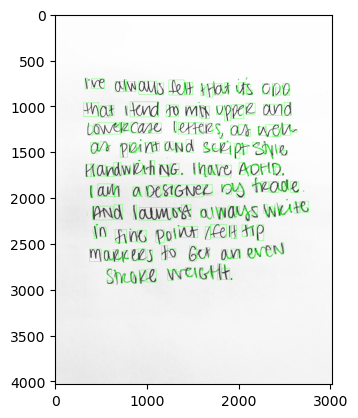

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
# img=cv2.imread("unnamed.jpg")
# image_preprocessing(img)


In [13]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def image_preprocessing(img, output_dir='character_images'):
#     denoise_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
#     img_gray = cv2.cvtColor(denoise_img, cv2.COLOR_BGR2GRAY)
#     ret, thresh2 = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
#     # ret, thresh2 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (150, 2))
#     mask = cv2.morphologyEx(thresh2, cv2.MORPH_DILATE, kernel)

#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     bounding_boxes = []

#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         if w > 5 and h > 5:  # Filter out small contours (adjust threshold as needed)
#             roi = img[y:y + h, x:x + w]
#             gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#             _, word_thresh = cv2.threshold(gray_roi, 100, 255, cv2.THRESH_BINARY_INV)
#             word_contours, _ = cv2.findContours(word_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#             for idx, word_contour in enumerate(word_contours):
#                 for char_contour in word_contour:
#                     cx, cy, cw, ch = cv2.boundingRect(char_contour)
#                     bounding_boxes.append((x + cx, y + cy, cw, ch))
#                     char_img = roi[cy:cy + ch, cx:cx + cw]
#                     cv2.imwrite(f"{output_dir}/character_{len(bounding_boxes)}.png", char_img)

# #                     Uncomment the following line if you want to visualize the bounding boxes on the original image
#                     cv2.rectangle(img, (x + cx, y + cy), (x + cx + cw, y + cy + ch), (0, 255, 0), 2)

# #     Uncomment the following lines if you want to display the original image with bounding boxes
#     plt.imshow(img, cmap='gray')
#     plt.show()

#     return bounding_boxes


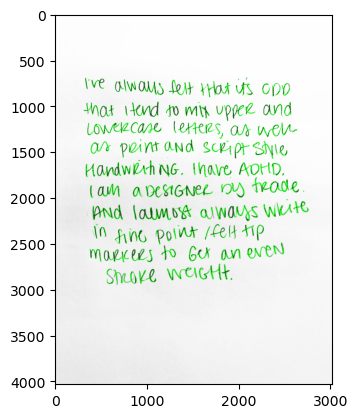

In [14]:
# input_image = cv2.imread("unnamed.jpg")
# output_directory = "C:/Users/lenovo/OneDrive/Desktop/New folder"
# character_bounding_boxes = image_preprocessing(input_image, output_dir=output_directory)


In [15]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def image_preprocessing(img, output_dir='character_images'):
#     denoise_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
#     img_gray = cv2.cvtColor(denoise_img, cv2.COLOR_BGR2GRAY)
#     adaptive_thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#     dilated_thresh = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_DILATE, kernel)

#     contours, _ = cv2.findContours(dilated_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     bounding_boxes = []

#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         aspect_ratio = w / float(h)
#         area = cv2.contourArea(contour)
#         if 1 < aspect_ratio < 3 and 100 < area < 1000:
#             bounding_boxes.append((x, y, w, h))
#             char_img = img[y:y + h, x:x + w]
#             cv2.imwrite(f"{output_dir}/character_{len(bounding_boxes)}.png", char_img)

# #             Uncomment the following line if you want to visualize the bounding boxes on the original image
#             cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# #     Uncomment the following lines if you want to display the original image with bounding boxes
#     plt.imshow(img, cmap='gray')
#     plt.show()

#     return bounding_boxes


In [16]:
# input_image = cv2.imread("unnamed.jpg")
# output_directory = "C:/Users/lenovo/OneDrive/Desktop/New folder"
# character_bounding_boxes = image_preprocessing(input_image, output_dir=output_directory)


KeyboardInterrupt: 

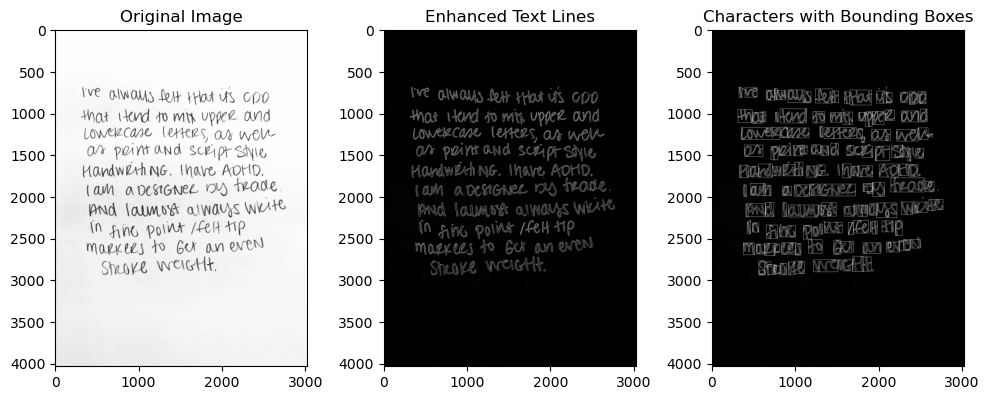

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_text_line(image):
    # Apply Sobel and Laplacian gradients to enhance edges and suppress background noise
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=11)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=11)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Combine Sobel and Laplacian gradients
    combined_gradient = np.sqrt(sobelx ** 2 + sobely ** 2 + laplacian ** 2)

    # Normalize the gradient values for better visualization
    normalized_gradient = (combined_gradient - np.min(combined_gradient)) / (np.max(combined_gradient) - np.min(combined_gradient)) * 255

    return normalized_gradient.astype(np.uint8)

def character_segmentation(text_line_image):
    # Apply thresholding to binarize the image
    _, binary_image = cv2.threshold(text_line_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Find contours of characters
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around characters on the original image
    img_with_boxes = text_line_image.copy()
    bounding_boxes=[]
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
         # Ignore very small bounding boxes (you can adjust the thresholds as needed)
        min_width = 30
        min_height = 30
        if w > min_width and h > min_height:
            cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (255, 0, 0), 2)
            bounding_boxes.append((x, y, w, h))

    return img_with_boxes, bounding_boxes

# Read the input image
img = cv2.imread('unnamed.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Image not loaded or incorrect path.")
else:
    # Enhance text lines
    enhanced_text_lines = enhance_text_line(img)

    # Segment characters and get bounding boxes
    img_with_boxes,b = character_segmentation(enhanced_text_lines)

    # Display the results
    plt.figure(figsize=(10, 8))
    plt.subplot(131)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(132)
    plt.imshow(enhanced_text_lines, cmap='gray')
    plt.title('Enhanced Text Lines')

    plt.subplot(133)
    plt.imshow(img_with_boxes, cmap='gray')
    plt.title('Characters with Bounding Boxes')

    plt.tight_layout()
    plt.show()


In [8]:
import cv2
import os

def crop_and_save_characters(img, bounding_boxes, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for i, bbox in enumerate(bounding_boxes):
        x, y, w, h = bbox
        character_img = img[y:y+h, x:x+w]

        # Save the character image to the output folder
        character_filename = os.path.join(output_folder, f'character_{i}.png')
        cv2.imwrite(character_filename, character_img)

# Assuming you have the bounding boxes in a list named "bounding_boxes"
# Example: bounding_boxes = [(x1, y1, width1, height1), (x2, y2, width2, height2), ...]

# Read the input image
img = cv2.imread('unnamed.jpg', cv2.IMREAD_GRAYSCALE)

# Perform character segmentation and get bounding boxes
# Assuming you already have the bounding boxes around characters
# If not, you can extract them using contour detection or other methods

# Specify the output folder to save the characters
output_folder = 'C:/Users/lenovo/OneDrive/Desktop/New folder'

# Crop and save the characters
crop_and_save_characters(img, b, output_folder)


In [140]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow import keras

# # Load the trained EMNIST model
# model = keras.models.load_model('model2.h5')

# def image_preprocessing(img):
#     denoise_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 6, 15)
#     img_gray = cv2.cvtColor(denoise_img, cv2.COLOR_BGR2GRAY)
#     ret, thresh2 = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (150, 2))
#     mask = cv2.morphologyEx(thresh2, cv2.MORPH_DILATE, kernel)

#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     bounding_boxes = []
#     word_characters = []
#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         if w > 5 and h > 5:  # Filter out small contours (adjust threshold as needed)
#             roi = img[y:y+h, x:x+w]
#             gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#             _, word_thresh = cv2.threshold(gray_roi, 100, 255, cv2.THRESH_BINARY_INV)
#             word_contours, _ = cv2.findContours(word_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#             word_contours = sorted(word_contours, key=lambda c: cv2.boundingRect(c)[0])  # Sort contours by x-coordinate

#             word = ""
#             for word_contour in word_contours:
#                 word_x, word_y, word_w, word_h = cv2.boundingRect(word_contour)
#                 char_img = gray_roi[word_y:word_y+word_h, word_x:word_x+word_w]
#                 char_img_resized = cv2.resize(char_img, (28, 28))  # Resize to match the model input size
#                 char_img_normalized = char_img_resized / 255.0  # Normalize the image
# #                 char_img_reshaped = np.reshape(char_img_normalized, (1, 28, 28, 1))  # Reshape for the model input
#                 char_img_reshaped = np.reshape(char_img_normalized, (1, 784))  # Reshape for the model input
# #                 predicted_label = model.predict(char_img_reshaped)[0]  # Predict the character label
                
#                 predicted_label = np.argmax(model.predict(char_img_reshaped)[0])  # Predict the character label
#                 character = chr(predicted_label + 97)  # Convert label to character
#                 word += character

#                 # Store the cropped character image and its predicted label
#                 bounding_boxes.append((x + word_x, y + word_y, word_w, word_h))
#                 word_characters.append((character, char_img))

#             cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

#     plt.imshow(img, cmap='gray')
#     plt.show()

#     return mask, bounding_boxes, word_characters,word,word_characters


In [107]:
# !pip install fuzzywuzzy

In [133]:
#                               # result 2
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def image_preprocessing(img):
#     denoise_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
#     img_gray = cv2.cvtColor(denoise_img, cv2.COLOR_BGR2GRAY)
#     ret, thresh2 = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (150, 2))
#     mask = cv2.morphologyEx(thresh2, cv2.MORPH_DILATE, kernel)

#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     bounding_boxes = []
#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         if w > 5 and h > 5:  # Filter out small contours (adjust threshold as needed)
#             roi = img[y:y+h, x:x+w]
#             gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#             _, word_thresh = cv2.threshold(gray_roi, 100, 255, cv2.THRESH_BINARY_INV)
#             word_contours, _ = cv2.findContours(word_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#             for word_contour in word_contours:
#                 word_x, word_y, word_w, word_h = cv2.boundingRect(word_contour)
#                 char_contours, _ = cv2.findContours(word_thresh[word_y:word_y+word_h, word_x:word_x+word_w],
#                                                     cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#                 for char_contour in char_contours:
#                     char_x, char_y, char_w, char_h = cv2.boundingRect(char_contour)
#                     bounding_boxes.append((x + word_x + char_x, y + word_y + char_y, char_w, char_h))
#                     cv2.rectangle(img, (x + word_x + char_x, y + word_y + char_y),
#                                   (x + word_x + char_x + char_w, y + word_y + char_y + char_h),
#                                   (0, 255, 0), 2)

#     plt.imshow(img, cmap='gray')
#     plt.show()

#     return mask
    

In [141]:
img1=cv2.imread("01.webp")
img2=cv2.imread("02.jpg")
img3=cv2.imread("03.png")
img4=cv2.imread("04.jpg")
img5=cv2.imread("05.png")
img6=cv2.imread("06.webp")
# plt.hist(img1.flat,bins=100,range=(0,255))

In [9]:
# image_preprocessing(img1)

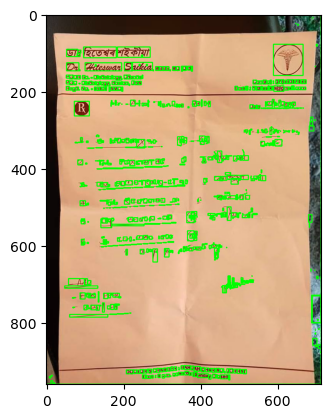

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [136]:
image_preprocessing(img2)
# plt.imshow(inp1,cmap='gray')

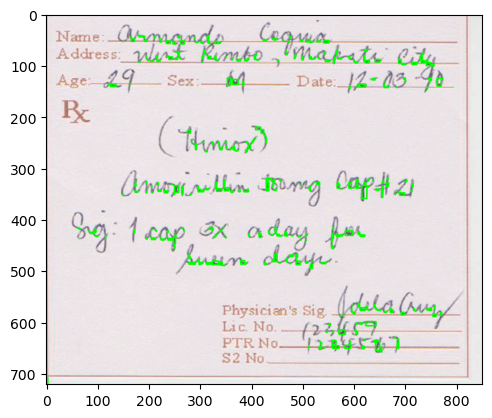

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [137]:
image_preprocessing(img3)

In [138]:
# image_preprocessing(img4)

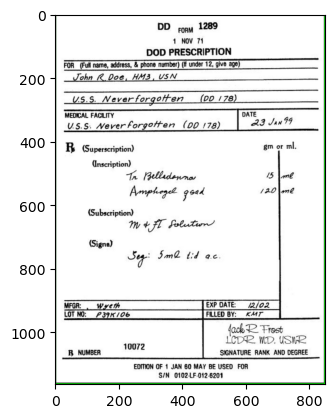

array([[  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [139]:
image_preprocessing(img5)

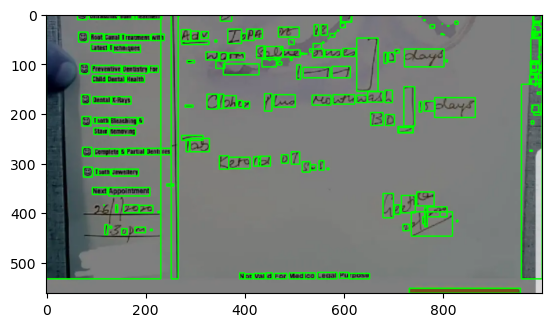

In [132]:
inp6=image_preprocessing(img6)

In [2]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# img = cv2.imread('img1.png',0)
# vp = np.mean(img,axis=0)
# vpt = vp[vp>250]
# cv2.imshow('Prescription',img)
# cv2.waitKey(0)
# plt.plot(vp)
# plt.plot(vpt)
# plt.show()
# cv2.destroyAllWindows()


